In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data=pd.read_csv("C:/Users/Sumit Kumar/Downloads/Attrition data.csv")
data

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [3]:
print(data.head())
print(data.info())
print(data.describe())

   EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  ...  \
0                 6          2  Life Sciences              1  Female  ...   
1                10          1  Life Sciences              1  Female  ...   
2                17          4          Other              1    Male  ...   
3                 2          5  Life Sciences              1    Male  ...   
4                10          1        Medical              1    Male  ...   

   TotalWorkingYears TrainingTimesLastYear YearsAtCompany  \
0                1.0     

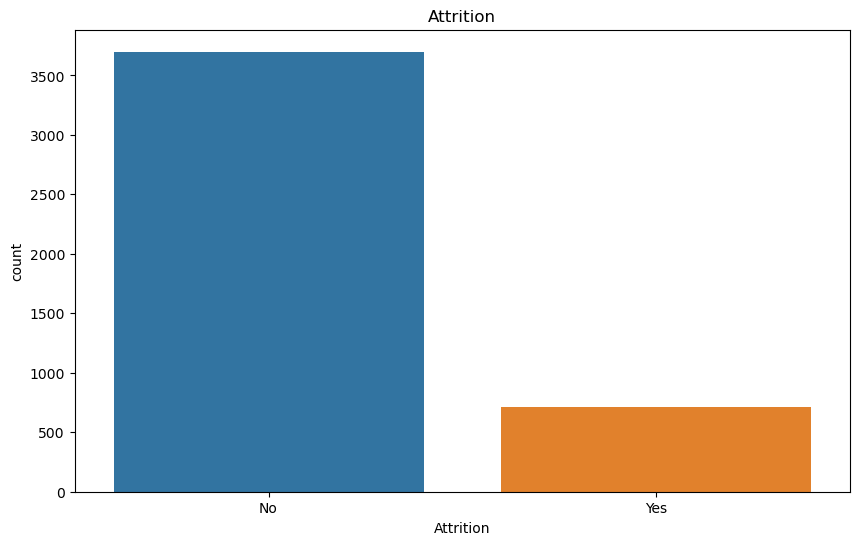

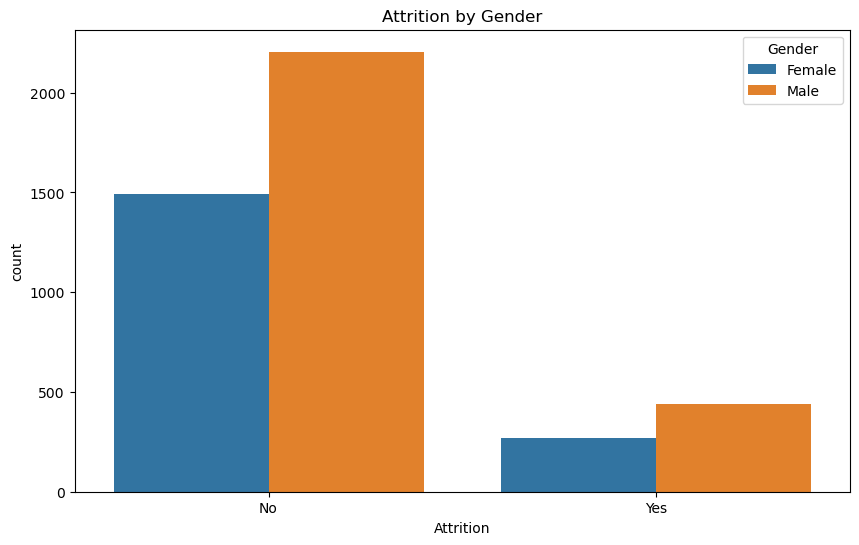

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Attrition', hue='Gender', data=data)
plt.title('Attrition by Gender')
plt.show()

In [21]:
import plotly.graph_objects as go


# Select the features to plot
features = ['Age', 'MonthlyIncome', 'TotalWorkingYears']

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data[features[0]],
    y=data[features[1]],
    z=data[features[2]],
    mode='markers',
    marker=dict(
        size=5,
        color=data['Attrition'].apply(lambda x: 'green' if x == 'No' else 'red'),
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Customize the layout
fig.update_layout(
    scene = {
        'xaxis_title': features[0],
        'yaxis_title': features[1],
        'zaxis_title': features[2]
    },
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

# Display the plot
fig.show()

In [6]:
import plotly.graph_objects as go

# Group the data by department and job role
dept_role = data.groupby(['Department', 'JobRole']).size().reset_index(name='count')

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = {
        "label": dept_role['Department'].unique().tolist() + dept_role['JobRole'].unique().tolist(),
        "pad": 15,
        "thickness": 20,
        "color": "light grey"
    },
    link = {
        "source": dept_role['Department'].map(dict(zip(dept_role['Department'].unique(), range(len(dept_role['Department'].unique()))))),
        "target": dept_role['JobRole'].map(dict(zip(dept_role['JobRole'].unique(), range(len(dept_role['Department'].unique()), len(dept_role['Department'].unique()) + len(dept_role['JobRole'].unique()))))) ,
        "value": dept_role['count']
    })])

fig.update_layout(title_text="Employee Mobility Sankey Diagram", font_size=10)
fig.show()

In [7]:
import plotly.express as px

# Create a scatter plot of age vs. monthly income, colored by attrition
fig = px.scatter(data, x='Age', y='MonthlyIncome', color='Attrition')
fig.update_layout(title='Age vs. Monthly Income', xaxis_title='Age', yaxis_title='Monthly Income')
fig.show()

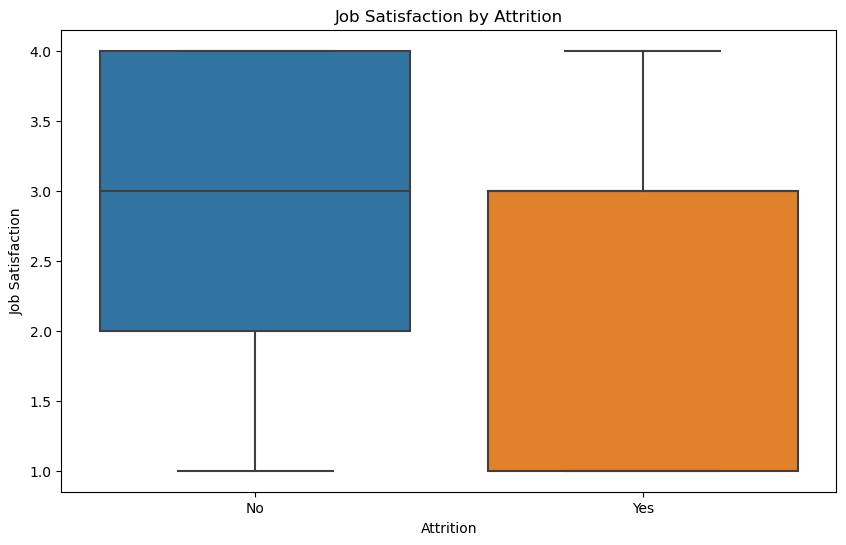

In [8]:
# Create a box plot of job satisfaction by attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=data)
plt.title('Job Satisfaction by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

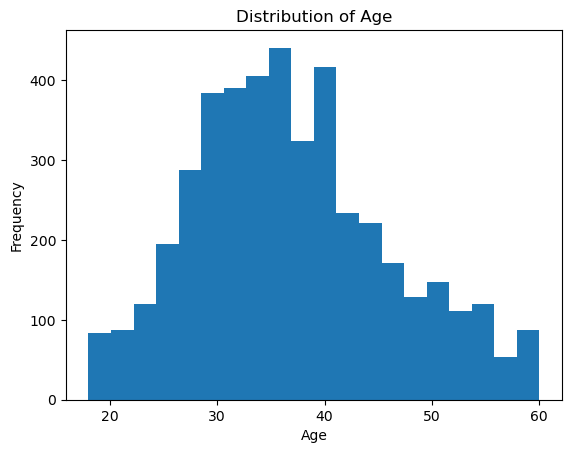

In [9]:
plt.hist(data['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

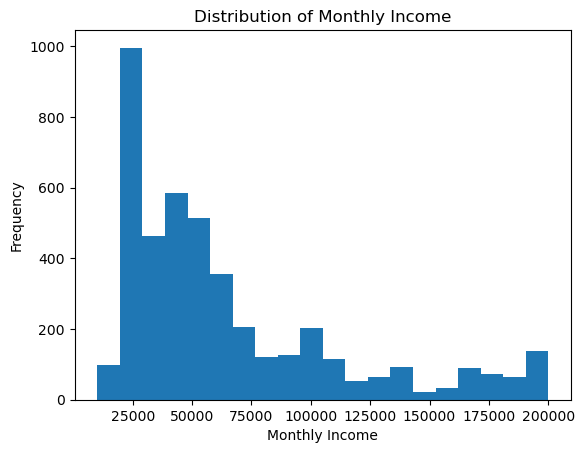

In [10]:
plt.hist(data['MonthlyIncome'], bins=20)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

In [11]:
age_mean = data['Age'].mean()
age_std = data['Age'].std()
print(f'Mean Age: {age_mean:.2f}')
print(f'Standard Deviation of Age: {age_std:.2f}')

# Calculate the mean and standard deviation of Monthly Income
income_mean = data['MonthlyIncome'].mean()
income_std = data['MonthlyIncome'].std()
print(f'Mean Monthly Income: {income_mean:.2f}')
print(f'Standard Deviation of Monthly Income: {income_std:.2f}')

Mean Age: 36.92
Standard Deviation of Age: 9.13
Mean Monthly Income: 65029.31
Standard Deviation of Monthly Income: 47068.89


Correlation between Age and Monthly Income: -0.0443


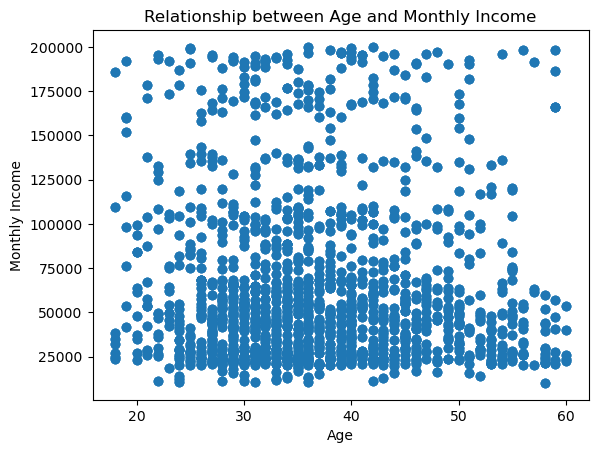

In [12]:
# Calculate the correlation between Age and Monthly Income
correlation = data['Age'].corr(data['MonthlyIncome'])
print(f'Correlation between Age and Monthly Income: {correlation:.4f}')

# Plot the relationship between Age and Monthly Income
plt.scatter(data['Age'], data['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Relationship between Age and Monthly Income')
plt.show()

In [13]:
# Identify outliers in Age
outliers_age = data[(data['Age'] > age_mean + 2 * age_std) | (data['Age'] < age_mean - 2 * age_std)]
print(outliers_age)

# Identify outliers in Monthly Income
outliers_income = data[(data['MonthlyIncome'] > income_mean + 2 * income_std) | (data['MonthlyIncome'] < income_mean - 2 * income_std)]
print(outliers_income)

      EmployeeID  Age Attrition     BusinessTravel              Department  \
38            39   18       Yes      Travel_Rarely  Research & Development   
43            44   18        No      Travel_Rarely                   Sales   
50            51   58        No         Non-Travel  Research & Development   
102          103   57        No      Travel_Rarely  Research & Development   
143          144   56        No  Travel_Frequently  Research & Development   
...          ...  ...       ...                ...                     ...   
4309        4310   58        No      Travel_Rarely                   Sales   
4315        4316   57        No      Travel_Rarely  Research & Development   
4327        4328   56        No      Travel_Rarely  Research & Development   
4377        4378   59        No      Travel_Rarely  Research & Development   
4384        4385   59        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCo

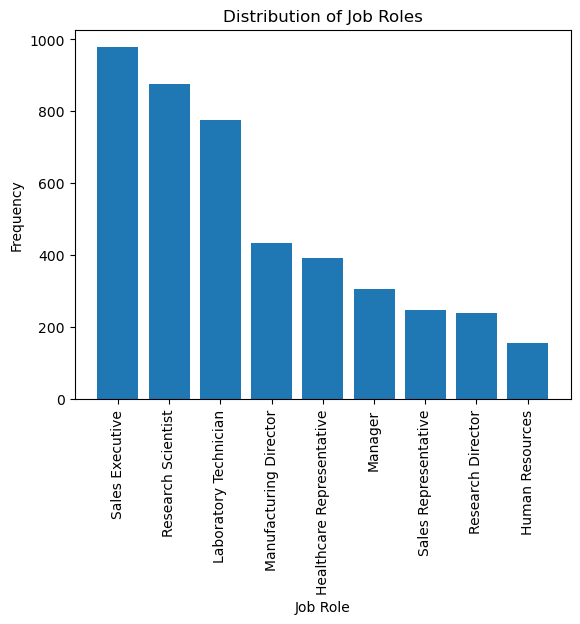

In [14]:
# Plot the distribution of Job Roles
plt.bar(data['JobRole'].value_counts().index, data['JobRole'].value_counts())
plt.title('Distribution of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Correlation between Job Satisfaction and Job Involvement: 0.0041


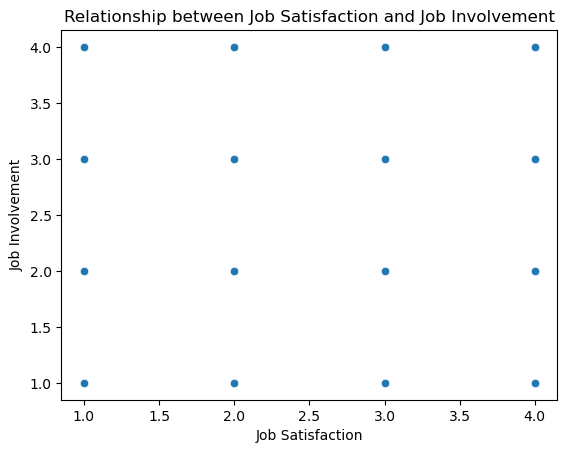

In [15]:
# Calculate the correlation between Job Satisfaction and Job Involvement
correlation = data['JobSatisfaction'].corr(data['JobInvolvement'])
print(f'Correlation between Job Satisfaction and Job Involvement: {correlation:.4f}')

# Plot the relationship between Job Satisfaction and Job Involvement
sns.scatterplot(x='JobSatisfaction', y='JobInvolvement', data=data)
plt.title('Relationship between Job Satisfaction and Job Involvement')
plt.xlabel('Job Satisfaction')
plt.ylabel('Job Involvement')
plt.show()

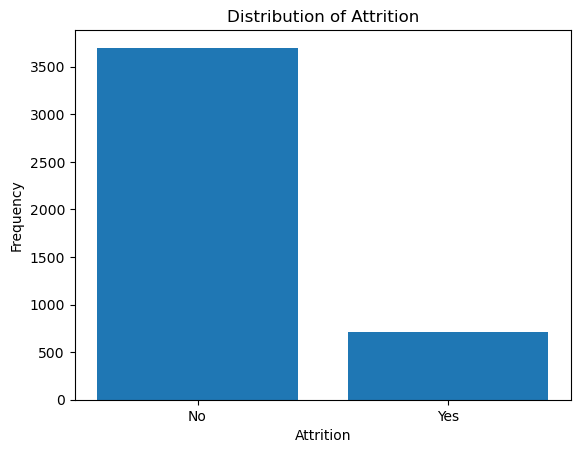

In [16]:
# Plot the distribution of Attrition
plt.bar(data['Attrition'].value_counts().index, data['Attrition'].value_counts())
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.show()

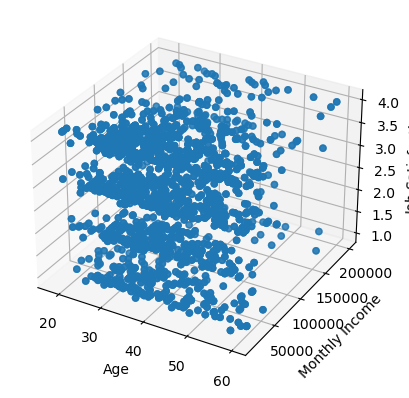

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Age'], data['MonthlyIncome'], data['JobSatisfaction'])

ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Job Satisfaction')

plt.show()

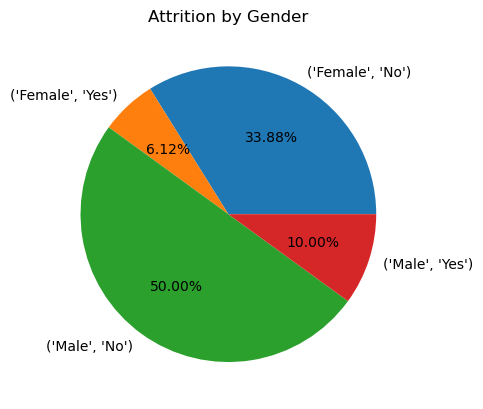

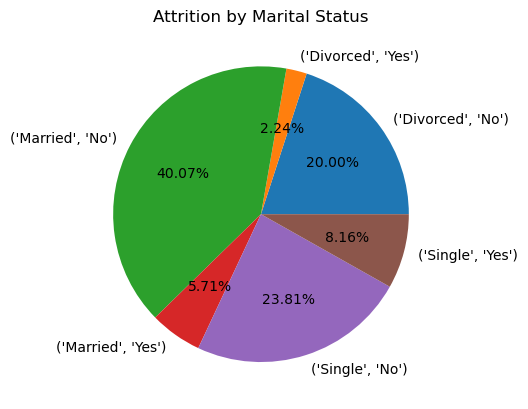

In [18]:
# Create a pie chart for attrition by gender
gender_attrition = data.groupby('Gender')['Attrition'].value_counts()
plt.pie(gender_attrition, labels = gender_attrition.index, autopct='%1.2f%%')
plt.title('Attrition by Gender')
plt.show()

# Create a pie chart for attrition by marital status
marital_status_attrition = data.groupby('MaritalStatus')['Attrition'].value_counts()
plt.pie(marital_status_attrition, labels = marital_status_attrition.index, autopct='%1.2f%%')
plt.title('Attrition by Marital Status')
plt.show()

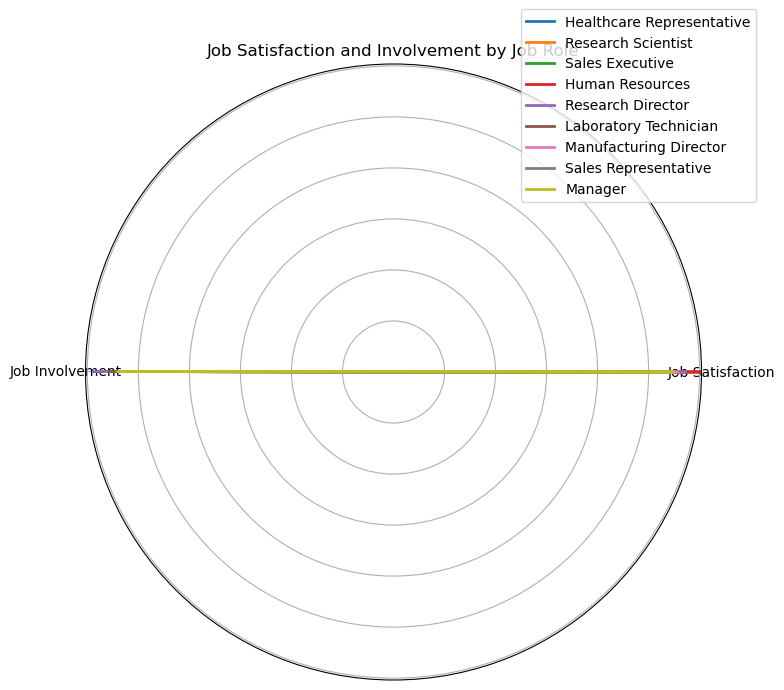

In [19]:
# Get unique job roles
job_roles = data['JobRole'].unique()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the radar parameters
categories = ['Job Satisfaction', 'Job Involvement']
N = len(categories)

# Compute the angles
angles = [n / float(N) * 2 * 3.14 for n in range(N)]
angles += angles[:1]  # Repeat the first angle to close the circle

# Plot the radar chart for each job role
for role in job_roles:
    # Filter the data for the current job role
    role_data = data[data['JobRole'] == role]
    
    # Calculate the mean job satisfaction and involvement for the current role
    job_satisfaction = role_data['JobSatisfaction'].mean()
    job_involvement = role_data['JobInvolvement'].mean()
    
    # Combine the values into a list
    values = [job_satisfaction, job_involvement, job_satisfaction]
    
    # Plot the radar chart
    ax.plot(angles, values, linewidth=2, label=role)
    ax.fill(angles, values, alpha=0.1)

# Add labels and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.title('Job Satisfaction and Involvement by Job Role')
plt.show()